<a href="https://colab.research.google.com/github/yuvrajssoni/AER850-Project3/blob/main/Step_1_Object_Masking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


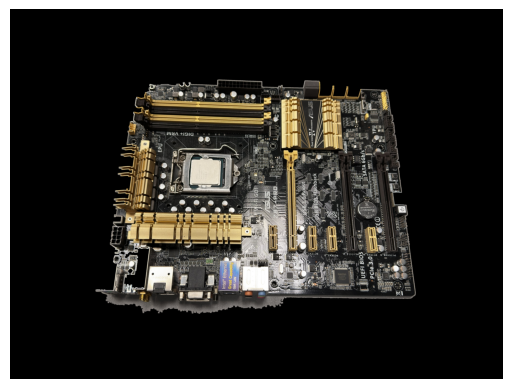

Step 1 images saved to: /content/drive/MyDrive/AER850 Project 3 Files/Results/Step 1


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

step1_results_dir = "/content/drive/MyDrive/AER850 Project 3 Files/Results/Step 1"
os.makedirs(step1_results_dir, exist_ok=True)

input_image_path = r"/content/drive/MyDrive/AER850 Project 3 Files/Project 3 Data/motherboard_image.JPEG"
original_motherboard_image = cv2.imread(input_image_path)

# Rotate image so PCB is oriented correctly
rotated_motherboard_image = cv2.rotate(
    original_motherboard_image,
    cv2.ROTATE_90_CLOCKWISE
)

# Convert image to grayscale
grayscale_image = cv2.cvtColor(
    rotated_motherboard_image,
    cv2.COLOR_BGR2GRAY
)

# Apply binary thresholding to separate PCB from background
_, thresholded_image = cv2.threshold(
    grayscale_image,
    100,
    255,
    cv2.THRESH_BINARY
)

# Detect edges and dilate them to strengthen PCB boundaries
edge_image = cv2.Canny(thresholded_image, 10, 150)
structuring_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
dilated_edges = cv2.dilate(edge_image, structuring_kernel, iterations=2)

# SAVE EDGE IMAGE
edge_output_path = f"{step1_results_dir}/Step1_Edges.png"
cv2.imwrite(edge_output_path, dilated_edges)

# Find contours and select the largest one
contours, _ = cv2.findContours(
    dilated_edges,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)
largest_pcb_contour = max(contours, key=cv2.contourArea)

# Create a mask from the largest contour
pcb_mask = np.zeros_like(thresholded_image)
cv2.drawContours(
    pcb_mask,
    [largest_pcb_contour],
    -1,
    255,
    thickness=cv2.FILLED
)

# SAVE MASK IMAGE
mask_output_path = f"{step1_results_dir}/Step1_Mask.png"
cv2.imwrite(mask_output_path, pcb_mask)

# Apply mask to the rotated image to isolate the PCB, then smooth it
masked_pcb_image = cv2.bitwise_and(
    rotated_motherboard_image,
    rotated_motherboard_image,
    mask=pcb_mask
)
blurred_masked_pcb_image = cv2.GaussianBlur(
    masked_pcb_image,
    (5, 5),
    0
)

# SAVE FINAL MASKED PCB IMAGE
final_output_path = f"{step1_results_dir}/Masked_Motherboard_PCB.jpeg"
cv2.imwrite(final_output_path, blurred_masked_pcb_image)

# Display the final masked PCB image
plt.imshow(cv2.cvtColor(blurred_masked_pcb_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

print("Step 1 images saved to:", step1_results_dir)
